In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
from scipy.stats import norm
import matplotlib.pyplot as plt

In [4]:
equity_his=pd.read_excel("climate_transition_risk.xlsx")
dne=pd.read_excel("climate_transition_risk.xlsx",sheet_name="Exxon Financial Info")
equity_vol=pd.read_excel("climate_transition_risk.xlsx",sheet_name="volatility")
Pricing_s=pd.read_excel("climate_transition_risk.xlsx",sheet_name="NGFS Climate Scenarios")

In [5]:
#equity_vol['year_vola']

In [6]:
## define constants
r=0.05
T=1

In [7]:
## get mean close price from yr 2012-2021
mean_equity=np.array(equity_his["Close Price"].groupby(equity_his['yr']).mean())[:-1]
## get share outstanding array in units, with 2012-2021
shares_out=(np.array(dne["Shares Outstanding (Millions)"])*1000000)[::-1]
## get E value, with 2012-2021
equity_his=mean_equity*shares_out
## get E volatility, with 2012-2021
sigma_e=np.array(equity_vol['year_vola'])[::-1][:-1]
## get debt value based on short_term+1/2LTD, with 2012-2021
debt_his=(np.array(dne["Short Term Debt (Millions)"]*1000000+1/2*dne["Long Term Debt (Millions)"]*1000000))[::-1]


#note all array arrange from 2012-2021

d_p=(np.log(A/D)+(r+sigma_a**2/2)*T)/(sigma_a*np.sqrt(T))
d_n=(np.log(A/D)+(r-sigma_a**2/2)*T)/(sigma_a*np.sqrt(T))
E=A*norm.cdf(d_p)-np.exp(-r*T)*D*norm.cdf(d_n)
E*sigma_e=A*sigma_a*norm.cdf(d_p)

def func(x):
    d_p=(np.log(x[0]/D)+(r+x[1]**2/2)*T)/(x[1]*np.sqrt(T))
    d_n=(np.log(x[0]/D)+(r-x[1]**2/2)*T)/(x[1]*np.sqrt(T))
    y=[x[0]*norm.cdf(d_p)-np.exp(-r*T)*D*norm.cdf(d_n)-E,
            (x[0]*x[1]*norm.cdf(d_p))/(E*s_e)-1]
    return y

In [8]:
def func(x):
    d_p=(np.log(x[0]/D)+(r+((x[1]**2)/2))*T)/(x[1]*np.sqrt(T))
    d_n=(np.log(x[0]/D)+(r-((x[1]**2)/2))*T)/(x[1]*np.sqrt(T))
    y=[x[0]*norm.cdf(d_p)-np.exp(-r*T)*D*norm.cdf(d_n)-E,
            (x[0]*x[1]*norm.cdf(d_p))/(E*s_e)-1]
    return y
A=[]
sigma_a=[]

for i in range(len(debt_his)):
    D=debt_his[i]
    s_e=sigma_e[i]
    E=equity_his[i]
    root = fsolve(func, [E+D,0.01],xtol=1.49012e-08)
    A.append(root[0])
    sigma_a.append(root[1])
    #s_a=root[1]
    #A=root[0]
    #d_n=(np.log(A/D)+(r-s_a**2/2)*T)/(s_a*np.sqrt(T))
    #dp1=norm.cdf(-d_n)
    #dp.append(dp1)

In [9]:
pd=np.array(norm.cdf(-(np.log(np.array(A)/debt_his)+(r-np.array(sigma_a)**2/2)*T)/(np.array(sigma_a)*np.sqrt(T))))
print(pd)

[4.42609763e-135 1.37560098e-114 5.87189181e-066 8.44055233e-030
 7.56491859e-043 2.48905581e-115 2.08850881e-033 9.50459149e-042
 1.66284116e-004 3.05702737e-018]


In [10]:
# verify
d_p=(np.log(np.array(A)/debt_his)+(r+np.array(sigma_a)**2/2)*T)/(np.array(sigma_a)*np.sqrt(T))
d_n=(np.log(np.array(A)/debt_his)+(r-np.array(sigma_a)**2/2)*T)/(np.array(sigma_a)*np.sqrt(T))
print(np.array(A)*norm.cdf(d_p)-np.exp(-r*T)*debt_his*norm.cdf(d_n)-equity_his)
(np.array(A)*np.array(sigma_a)*norm.cdf(d_p))/(equity_his*sigma_e)-1

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.05175781e-05 -3.05175781e-05  0.00000000e+00  3.05175781e-05
  2.71606445e-03  0.00000000e+00]


array([-1.80715054e-06, -9.96417027e-06, -1.27528408e-05, -2.49995706e-05,
       -2.12188308e-05, -2.26458461e-05, -1.96010426e-05, -2.98511415e-05,
       -2.64277489e-12, -2.32041948e-05])

Text(0, 0.5, 'PD Value')

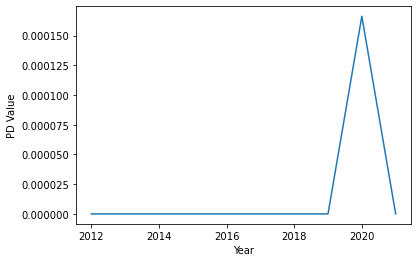

In [11]:
yr=np.arange(2012,2022,1)
plt.plot(np.array(yr),np.array(pd))
plt.xlabel("Year")
plt.ylabel("PD Value")

In [12]:
import pandas as pd
newdf = pd.DataFrame()
newdf["Year"] = dne["Year"][::-1]
newdf["A"] = A
newdf["sigma"] = sigma_a
#newdf["PD"] = np.array(pd)
newdf.head()
newdf.to_csv("Asigma_Estimates.csv")

In [13]:
#new emission A estimate
D=np.mean(debt_his)
s_e=np.mean(sigma_e)
E= np.mean(equity_his)
s_a = np.mean(sigma_a)
def func(x):
    d_p=(np.log(x/D)+(r+((s_a**2)/2))*T)/(s_a*np.sqrt(T))
    d_n=(np.log(x/D)+(r-((s_a**2)/2))*T)/(s_a*np.sqrt(T))
    y=x[0]*norm.cdf(d_p)-np.exp(-r*T)*D*norm.cdf(d_n)-E
    return y
root = fsolve(func, E+D,xtol=1.49012e-08)
print(root)
A_est = root
E1 = 112 * 1000000/2
E2 = 112* 1000000/2
E3 = 650* 1000000

[2.75772319e+11]


In [14]:
Pricing_s["Cost E12"] = Pricing_s["Carbon price (US$2010/t CO2)"] * (E1+E2)
Pricing_s["Cost E3"]= Pricing_s["Carbon price (US$2010/t CO2)"] * (E3)
Pricing_s["Reduced Asset E12"] = A_est - Pricing_s["Cost E12"]
Pricing_s["Reduced Asset E123"] = A_est - Pricing_s["Cost E12"]  - Pricing_s["Cost E3"]
Pricing_s["A/D E12"] = Pricing_s["Reduced Asset E12"]/D
Pricing_s["A/D E123"] = Pricing_s["Reduced Asset E123"]/D
pd12=norm.cdf(-(np.log(Pricing_s["Reduced Asset E12"]/D)+(r-np.array(s_a)**2/2)*T)/(np.array(s_a)*np.sqrt(T)))
pd123=norm.cdf(-(np.log(Pricing_s["Reduced Asset E123"]/D)+(r-np.array(s_a)**2/2)*T)/(np.array(s_a)*np.sqrt(T)))
Pricing_s["PD E12"] = pd12
Pricing_s["PD E123"] = pd123
Pricing_s.head()

C:\Users\kllqz\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Time,Scenario,Carbon price (US$2010/t CO2),Cost E12,Cost E3,Reduced Asset E12,Reduced Asset E123,A/D E12,A/D E123,PD E12,PD E123
0,2025,Nationally Determined Contributions (NDCs),25.653253,2.873164e+09,1.667461e+10,2.728992e+11,2.562245e+11,10.158791,9.538071,6.558752e-34,3.213386e-32
1,2030,Nationally Determined Contributions (NDCs),76.732026,8.593987e+09,4.987582e+10,2.671783e+11,2.173025e+11,9.945831,8.089182,2.453669e-33,5.126190e-28
2,2035,Nationally Determined Contributions (NDCs),86.903496,9.733192e+09,5.648727e+10,2.660391e+11,2.095519e+11,9.903423,7.800660,3.197138e-33,3.932037e-27
3,2040,Nationally Determined Contributions (NDCs),88.807857,9.946480e+09,5.772511e+10,2.658258e+11,2.081007e+11,9.895484,7.746641,3.359802e-33,5.783605e-27
4,2045,Nationally Determined Contributions (NDCs),90.712219,1.015977e+10,5.896294e+10,2.656126e+11,2.066496e+11,9.887544,7.692622,3.530822e-33,8.519156e-27


In [15]:
Pricing_s.to_csv("Senarios_constant.csv")

In [16]:
diff=(E1+E2)/28
E12_s=[diff*25,diff*20,diff*15,diff *10,diff*5,0]


In [17]:
Pricing_s=pd.read_excel("climate_transition_risk.xlsx",sheet_name="NGFS Climate Scenarios")
#E12_s = np.linspace(0, E1+E2, 6)[::-1]
E12_s = np.concatenate([E12_s, E12_s, E12_s])
Pricing_s["E12 Emission"] = E12_s
Pricing_s["Cost E12"] = Pricing_s["Carbon price (US$2010/t CO2)"] * E12_s
Pricing_s["Cost E3"]= Pricing_s["Carbon price (US$2010/t CO2)"] * (E3)
Pricing_s["Reduced Asset E12"] = A_est - Pricing_s["Cost E12"]
Pricing_s["Reduced Asset E123"] = A_est - Pricing_s["Cost E12"]  - Pricing_s["Cost E3"]
Pricing_s["A/D E12"] = Pricing_s["Reduced Asset E12"]/D
Pricing_s["A/D E123"] = Pricing_s["Reduced Asset E123"]/D
pd12=norm.cdf(-(np.log(Pricing_s["Reduced Asset E12"]/D)+(r-np.array(s_a)**2/2)*T)/(np.array(s_a)*np.sqrt(T)))
pd123=norm.cdf(-(np.log(Pricing_s["Reduced Asset E123"]/D)+(r-np.array(s_a)**2/2)*T)/(np.array(s_a)*np.sqrt(T)))
Pricing_s["PD E12"] = pd12
Pricing_s["PD E123"] = pd123
Pricing_s.head()

C:\Users\kllqz\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Time,Scenario,Carbon price (US$2010/t CO2),E12 Emission,Cost E12,Cost E3,Reduced Asset E12,Reduced Asset E123,A/D E12,A/D E123,PD E12,PD E123
0,2025,Nationally Determined Contributions (NDCs),25.653253,100000000.0,2.565325e+09,1.667461e+10,2.732070e+11,2.565324e+11,10.170250,9.549530,6.112040e-34,2.986747e-32
1,2030,Nationally Determined Contributions (NDCs),76.732026,80000000.0,6.138562e+09,4.987582e+10,2.696338e+11,2.197579e+11,10.037235,8.180586,1.390022e-33,2.710255e-28
2,2035,Nationally Determined Contributions (NDCs),86.903496,60000000.0,5.214210e+09,5.648727e+10,2.705581e+11,2.140708e+11,10.071644,7.968881,1.123185e-33,1.193023e-27
3,2040,Nationally Determined Contributions (NDCs),88.807857,40000000.0,3.552314e+09,5.772511e+10,2.722200e+11,2.144949e+11,10.133509,7.984667,7.664408e-34,1.067438e-27
4,2045,Nationally Determined Contributions (NDCs),90.712219,20000000.0,1.814244e+09,5.896294e+10,2.739581e+11,2.149951e+11,10.198210,8.003288,5.146659e-34,9.363197e-28


In [18]:
Pricing_s.to_csv("Senarios_stepwise.csv")